#  Matrizes de transformação - estudos


### Testes de como usar o Sympy para multiplicar matrizes algébricas

In [344]:

from sympy import symbols
from sympy.core.trace import Tr
#from sympy.matrices.matrices import Matrix
from IPython.core.display import display_pretty
from sympy.printing.latex import *

from sympy import init_printing; init_printing()
from sympy.interactive import printing
#printing.init_printing(use_latex=False) # Use this option if you don't have Latex Installed
printing.init_printing(use_latex=True)
#printing.init_printing(use_latex=mathjax)

from IPython.display import display

import sympy as sp
import math

Declaração de uma série de símbolos dos quais vamos precisar

In [345]:
alpha, beta, c_x, c_y,  t_x, t_y, theta, scale, a, b =  sp.symbols("alpha, beta, c_x, c_y, t_x, t_y, theta, scale, a, b")

In [346]:

# Funções auxiliares para criar as transformações básicas
#    return sp.Matrix([[1, 0, 0],[0, 1, 0 ],[0, 0, 1]])


def make_translation(transx, transy):
    """
        Receives x and y translation values and returns a translation matrix
    """
    return sp.Matrix([[1, 0, transx],[0, 1, transy ],[0, 0, 1]])

def make_rotation(angle):
    """
        Counter-clockwise rotations to match OpenCV.
        TODO: really check if OpenCV rotates according to documentation
    """
    a = sp.cos(angle)
    b = sp.sin(angle)
    return sp.Matrix([[a, b, 0],[-b, a, 0 ],[0, 0, 1]])

def make_rotation_scale_a_b():
    """
        returns a generic rotation matrix where
        a = scale.cos(angle)
        b = scale.sin(angle)
    """
    return sp.Matrix([[a, b, 0],[-b, a, 0 ],[0, 0, 1]])


def make_scale(scale_f):
    return sp.Matrix([[scale, 0, 0],[0, scale, 0 ],[0, 0, 1]])
    
def make_column_point(x, y):
    return sp.Matrix([[x],[y],[1]])



In [347]:
mat45 = make_rotation(math.pi/4)

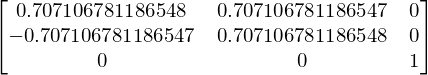

In [348]:
mat45

In [349]:
mat_theta = make_rotation(theta)

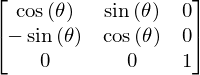

In [350]:
mat_theta

In [351]:
mat_trans_tx_ty = make_translation(t_x, t_y)


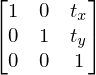

In [352]:
mat_trans_tx_ty

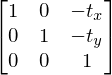

In [353]:
mat_trans_tx_ty.inv()

In [354]:
mat_trans_minus_tx_ty = make_translation(-t_x, -t_y)

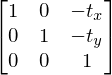

In [355]:
mat_trans_minus_tx_ty

In [356]:
mat_scale = make_scale(scale)

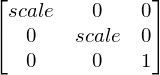

In [381]:
mat_scale

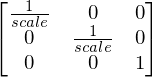

In [357]:
mat_scale.inv()

In [358]:
math.cos(-math.pi/4)

In [359]:
math.cos(math.pi/4)

### Transformação de rotação ao redor de um ponto arbitrário

Girar ao redor de um ponto $c_x, c_y$ é deslocar aquele ponto para a origem fazendo uma transformação $-c_x, -c_y$, aplicar a rotação $\theta$ e depois devolver o ponto ao seu lugar fazendo uma translação por $c_x, c_y$. Ou seja:

In [360]:
mat_trans_center = make_translation(c_x, c_y)

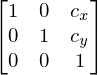

In [361]:
mat_trans_center

In [362]:
mat_trans_minus_center = mat_trans_center.inv()

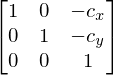

In [363]:
mat_trans_minus_center

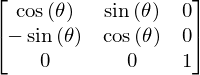

In [364]:
mat_theta

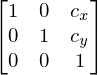

In [365]:
mat_trans_center

Concatenando as três transformações, lembrando que a primeira multiplicação ocorre à direta:

In [366]:
mat_rotacao_center = mat_trans_center*mat_theta*mat_trans_minus_center

Chegamos à formula para rotação arbitrária em torno de um ponto presente [na documentação da OpenCV](http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0)



$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$




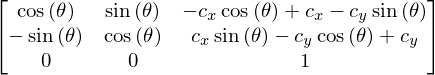

In [367]:
mat_rotacao_center

## Tranformação geral de rotação, escala e translação

Podemos também obter uma transformação geral de forma mais simples, fazendo com que seja uma combinação de rotação em torna da origem, escala e depois translação.

Aplicando as transformações na ordem em que seriam multiplicadas, teríamos:

$$ T \cdot S \cdot R $$

In [368]:
mat_geral = mat_trans_tx_ty * mat_scale * mat_theta

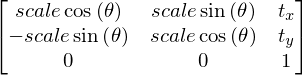

In [369]:
mat_geral

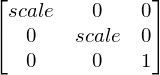

In [386]:
mat_scale

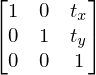

In [388]:
mat_trans_tx_ty

A fórmula acima coincide com a fornecida [na seção 11.2 do livro Computer Vision, de Shepard and Shapiro](Shapiro and Shepard. Computer Vision. Seção 11.2, Capítulo 11](https://courses.cs.washington.edu/courses/cse576/book/ch11.pdf)
). O sinal dos componentes com $\sin(\theta)$ está invertido porque trabalhamos com ângulo no sentido horário e o livro trabalha no sentido anti-horário. A seguir vamos entender melhor esta transformação.

# Desenvolvendo a matriz  de transformações 2D com rot, trans e escala

Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = -s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



### Sistema para encontrar rotation-scale + translation

Vamos montar um sistema de equações para encontrar rotation-scale e translation

Primeiro vamos obter uma matriz composta de rotation-scale e translation

In [370]:
rotab = make_rotation_scale_a_b()

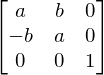

In [371]:
rotab

In [372]:
trans = make_translation(t_x, t_y)

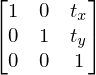

In [373]:
trans

In [374]:
M = trans*rotab

Vamos trabalhar com a matrix M como transformação geral. As variáveis do nosso sistema serão $a$, $b$, $t_x$ e $t_y$

Lembrando que:
$a = scale *\cos(angulo)$
e
$b = scale * \sin(angulo) $

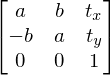

In [375]:
M

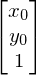

In [383]:
p0

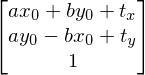

In [384]:
M*p0

In [376]:
## Criação de muitos pontos. Vamos fazer com pontos o suficiente para o sistema ser sobredeterminado

# Pontos na entrada
x0, y0, x1, y1, x2, y2, x3, y3, x4, y4 = sp.symbols("x_0, y_0, x_1, y_1, x_2, y_2, x_3, y_3, x_4, y_4")
p0 = make_column_point(x0, y0)
p1 = make_column_point(x1, y1)
p2 = make_column_point(x2, y2)
p3 = make_column_point(x3, y3)
p4 = make_column_point(x4, y4)

points_entrada = [p0, p1, p2, p3, p4]

# Pontos na saida
xs0, ys0, xs1, ys1, xs2, ys2, xs3, ys3, xs4, ys4 = sp.symbols("x_s0, y_s0, x_s1, y_s1, x_s2, y_s2, x_s3, y_s3, x_s4, y_s4")

ps0 = make_column_point(xs0, ys0)
ps1 = make_column_point(xs1, ys1)
ps2 = make_column_point(xs2, ys2)
ps3 = make_column_point(xs3, ys3)
ps4 = make_column_point(xs4, ys4)

points_saida = [ps0, ps1, ps2, ps3, ps4]

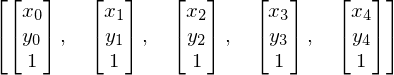

In [377]:
points_entrada

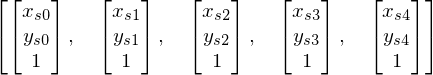

In [378]:
points_saida

Finalmente, as equações:

In [379]:
equations = []
system_eq = [] # Sistema de equações supondo =0
left_side = [] # Lado esquerdo do sistema

for p in points_entrada:
    produto = M*p
    equations.append(produto)

print("Equations of the overdetermined system")
    
for i in range(len(equations)):
    for j in range(len(equations[i][:-1])): # -1 excludes the homogeneous coordinate (extra 1 at the end)
        eq = equations[i][j]-points_saida[i][j]
        left_side.append(equations[i][j])
        system_eq.append(eq)

        
for equation in system_eq:
    display(equation)

Equations of the overdetermined system


In [385]:
for eq in left_side:
    display(eq)

## Referências

[Tutorial de Sympy - exemplificando seus diversos recursos](https://minireference.com/static/tutorials/sympy_tutorial.pdf)



